In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


**Task A**: Fourier Transform of Images: we compare the Fourier transform of two different images. 
The following functions can be used to compute a Fourier transform of a given image. Note that low frequencies are shifted to the center of the transformed image.  

In [2]:
def fourier_transform(img):
    f = np.fft.fft2(img)
    # shift the zero-frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    return fshift

def inverse_fourier_transform(f):
    # shift the zero-frequency component back to the original place
    f = np.fft.fftshift(f)
    img = abs(np.fft.ifft2(f))
    return img

def get_fourier_magnitude_spectrum(img):
    f = fourier_transform(img)
    magnitude_spectrum = 20*np.log(np.abs(f))
    return magnitude_spectrum

def plot_img(img):
    plt.imshow(img, cmap='gray')
    
def plot_img_with_fourier_spectrum(img, fourier_magnitude_spectrum):
    plt.subplot(121)
    plot_img(img)
    plt.subplot(122)
    plot_img(fourier_magnitude_spectrum)

Here we plot the magnitude spectrum of two different images. Answer the following questions: 
<ul>
  <li>What is the difference between these two spectrums?</li>
  <li>What is the source of this difference in spectrums?</li>
</ul>

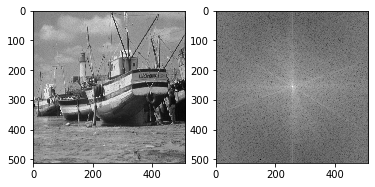

In [3]:
img_boat = io.imread("boat.png")
f_boat = get_fourier_magnitude_spectrum(img_boat)
plot_img_with_fourier_spectrum(img_boat, f_boat)

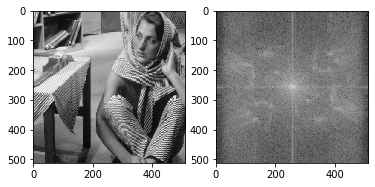

In [4]:
img_barbara = io.imread("barbara.png")
f_barbara = get_fourier_magnitude_spectrum(img_barbara)
plot_img_with_fourier_spectrum(img_barbara, f_barbara)

The following function constructs a mask that you'll need for the next exercises.

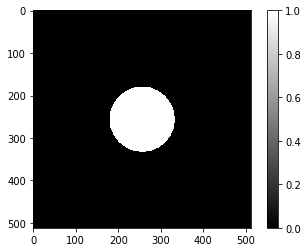

In [5]:
def get_mask(nrows, ncols, keep_frac=0.1):
    row, col = np.ogrid[:nrows, :ncols]
    cnt_row, cnt_col = nrows / 2, ncols / 2
    radius = np.sqrt(keep_frac*nrows*ncols/np.pi)
    outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < radius ** 2)
    return outer_disk_mask.astype(float)

mask = get_mask(*img_boat.shape, keep_frac=0.07)
plot_img(mask)
plt.colorbar()

**Task B**: Use the shifted fourier spectrum together with the above mask to implement a lowpass filtering. The steps to accomplish this task are as follows. First,  apply the filter (=mask) to the spectrum. Then, use the inverse fourier transform to reconstruc the image.

Compare both images to their reconstructed version.

For which is the reconstruction closer to the original version? Why?

In [6]:
#solution boat

In [7]:
#solution barbara